In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.manifold import TSNE  # Unfortunately MulticoreTSNE is no longer available
import chart_studio.plotly as py   # use 'pip install plotly' and 'pip install chart-studio'
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [73]:
dataset = pd.read_csv('/content/drive/My Drive/Employees.csv')
print(dataset.head(3))

   Age BusinessTravel  ... YearsSinceLastPromotion  YearsWithCurrManager
0   46  Travel_Rarely  ...                       0                     2
1   37  Travel_Rarely  ...                       0                     2
2   59     Non-Travel  ...                       2                     2

[3 rows x 26 columns]


In [0]:
from matplotlib import pyplot as plt

In [0]:
converter = LabelEncoder()
dataset['JobRole'] = converter.fit_transform(dataset['JobRole'].astype(str))
dataset['OverTime'] = converter.fit_transform(dataset['OverTime'].astype(str))
dataset['Gender'] = converter.fit_transform(dataset['Gender'].astype(str))
dataset['BusinessTravel'] = converter.fit_transform(dataset['BusinessTravel'].astype(str))
dataset['Department'] = converter.fit_transform(dataset['Department'].astype(str))
dataset['EducationField'] = converter.fit_transform(dataset['EducationField'].astype(str))
dataset['MaritalStatus'] = converter.fit_transform(dataset['MaritalStatus'].astype(str))

In [6]:
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [0]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(dataset)

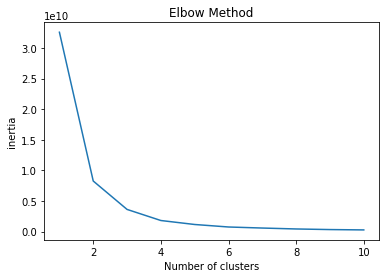

In [10]:
# Elbow plot method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

Variance explained by each of the n_components:  [0.1801924  0.07236917]
Total variance explained by the n_components:  0.2525615722189879


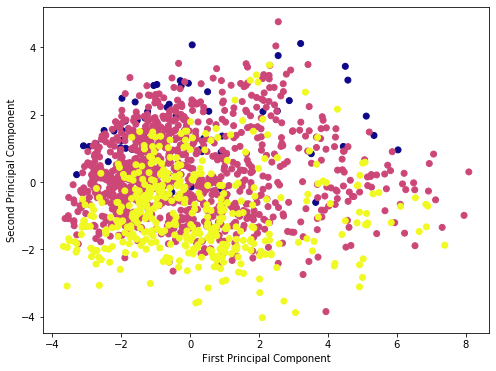

In [13]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c = dataset.Department, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Cluster Centers: 
 [[ 0.64326371  0.00962056  0.06532562 -0.01545783  0.15496755 -0.02958571
   0.05610961 -0.04250741  0.01372709  1.02821931 -0.11579418  0.01205844
  -0.10356186  0.99509683  0.05336741 -0.03110805 -0.04066652 -0.00526109
   0.07390983  1.02018787 -0.01260014  0.01558939  0.96276413  0.93868173
   0.80701459  0.88499187]
 [-0.29389948 -0.00439552 -0.02984649  0.0070625  -0.07080282  0.01351736
  -0.02563581  0.01942113 -0.00627174 -0.46978107  0.05290497 -0.00550936
   0.04731617 -0.45464781 -0.02438293  0.0142129   0.01858004  0.00240373
  -0.03376852 -0.46611161  0.00575685 -0.00712261 -0.43987538 -0.42887243
  -0.36871529 -0.40434217]]
Homogeneity score:  0.0012589282989960635
Silhouette score:  0.13742668669151625


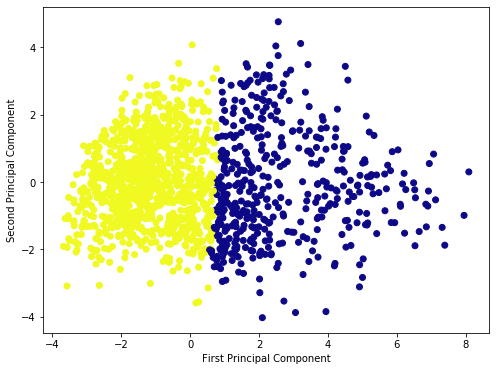

In [15]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
print("Cluster Centers: \n",kmeans.cluster_centers_)
print("Homogeneity score: ", metrics. homogeneity_score(dataset.Department, kmeans.labels_))
print("Silhouette score: ", metrics. silhouette_score(X_scaled, kmeans.labels_))
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [0]:
tsne = TSNE(n_components = 2, perplexity = 10,n_iter=2000)
x_tsne = tsne.fit_transform(X_scaled)

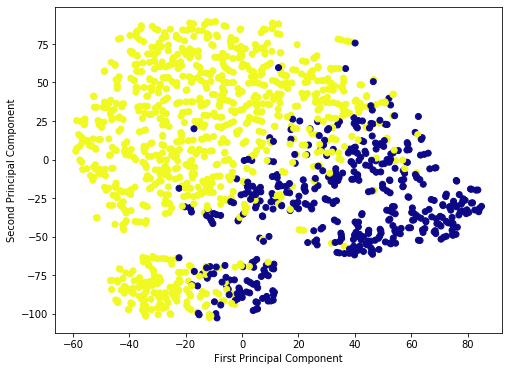

In [17]:
layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
plt.figure(figsize = (8,6))
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [18]:
# Selecting Attributes to create clusters at Company Level
X = dataset.drop(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',	
                'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',	
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis = 1)
Y = dataset['JobRole'] # Dependent Variable
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1470, 4)
(1470,)


In [19]:
# Applying Standard Scalar
 X_scaled = feature_scaler.fit_transform(X)
 print(X_scaled)

[[-1.40533367 -0.31487876 -0.49117353 -0.61549158]
 [-1.40533367 -0.94126583 -0.65445374 -0.61549158]
 [-0.59265055  2.62221364 -0.65445374 -0.61549158]
 ...
 [ 1.03271569  1.17459659  2.12130982  1.3171933 ]
 [ 1.43905725 -0.75152239 -0.49117353 -0.61549158]
 [ 1.03271569 -0.23647414  0.32522752  0.48889978]]


In [22]:
# t-SNE plot
tsne = TSNE(n_components = 2, perplexity = 5, n_iter=1000)
x_tsne = tsne.fit_transform(X_scaled)

JobRole = list(X['JobRole'])
YearsInCurrentRole= list(X['YearsInCurrentRole'])
MonthlyIncome = list(X['MonthlyIncome'])
YearsAtCompany = list(X['YearsAtCompany'])

data1 = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers', marker = dict(color=Y, opacity=0.5),
                              text=[f'JobRole: {a}, YearsInCurrentRole: {b},MonthlyIncome:{c}, YearsAtCompany:{d}'
                                      for a,b,c,d in list(zip(JobRole,YearsInCurrentRole,MonthlyIncome,YearsAtCompany))],hoverinfo='text')]

layout = go.Layout(title = 't-SNE Plot to visualize Company Level Clusters', width = 700, height = 700,
                   xaxis = dict(title='First Dimension'),
                   yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data1, layout=layout)
fig.show()

In [0]:
# Defining function for Age of Employees
def converter(Age):
    if Age <=35:
        return 1 
    else:
      if Age >35:
        return 2 

In [76]:
dataset['Age'] = dataset['Age'].apply(converter)
print(dataset.Age.head())

0    2
1    2
2    2
3    2
4    1
Name: Age, dtype: int64


In [0]:
# Defining function for JobSatisfaction
def converter1(JobSatisfaction):
    if JobSatisfaction <= 2:
        return 0 # UnSatisfied
    else:
        return 1 # Satisfied

In [78]:
dataset['JobSatisfaction'] = dataset['JobSatisfaction'].apply(converter1)
print(dataset.JobSatisfaction.head())

0    0
1    0
2    1
3    1
4    1
Name: JobSatisfaction, dtype: int64


In [79]:
# Selecting Attributes to create clusters at Department Level
X1 = dataset.drop(['BusinessTravel', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',	
                'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',	
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis = 1)
Y1 = dataset['Department'] # Dependent Variable
print(type(X1))
print(type(Y1))
print(X1.shape)
print(Y1.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1470, 4)
(1470,)


In [80]:
# Applying Standard Scalar
 X_scaled = feature_scaler.fit_transform(X1)
 print(X_scaled)

[[ 0.99186978 -2.38914662  0.81649658 -1.25836393]
 [ 0.99186978 -2.38914662  0.81649658 -1.25836393]
 [ 0.99186978 -2.38914662 -1.22474487  0.79468266]
 ...
 [ 0.99186978  1.40151234 -1.22474487  0.79468266]
 [-1.00819686  1.40151234 -1.22474487  0.79468266]
 [ 0.99186978  1.40151234  0.81649658 -1.25836393]]


In [82]:
# t-SNE plot
tsne = TSNE(n_components = 2, perplexity = 5, n_iter=1000)
x_tsne = tsne.fit_transform(X_scaled)

Department = list(X1['Department'])
Age= list(X1['Age'])
JobSatisfaction = list(X1['JobSatisfaction'])
Gender = list(X1['Gender'])

data2 = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers', marker = dict(color=Y1, colorscale='Rainbow', opacity=0.5),
                              text=[f'Department: {a}, Age: {b},JobSatisfaction:{c}, Gender:{d}'
                                      for a,b,c,d in list(zip(Department,Age,JobSatisfaction,Gender))],hoverinfo='text')]

layout = go.Layout(title = 't-SNE Plot to visualize Department Level Clusters', width = 700, height = 700,
                   xaxis = dict(title='First Dimension'),
                   yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data2, layout=layout)
fig.show()

In [45]:
# Defining Low & High JobLevel
def converter3(JobLevel):
    if JobLevel <= 2:
        return 0 # Low
    else:
        return 1 # High

dataset['JobLevel'] = dataset['JobLevel'].apply(converter3)
print(dataset.JobLevel.head())

0    0
1    0
2    1
3    1
4    0
Name: JobLevel, dtype: int64


In [65]:
# Selecting Attributes to create clusters for Employee Churn
X2 = dataset.drop(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',	
                'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',	
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis = 1)
Y2 = dataset['JobSatisfaction'] # Dependent Variable
print(type(X2))
print(type(Y2))
print(X2.shape)
print(Y2.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1470, 4)
(1470,)


In [66]:
# Applying Standard Scalar
 X_scaled = feature_scaler.fit_transform(X2)
 print(X_scaled)

[[-0.05778755 -1.25836393  1.59174553 -0.67914568]
 [-0.96148639 -1.25836393  1.59174553 -0.67914568]
 [ 2.65330899  0.79468266 -0.62824112 -0.05828489]
 ...
 [ 1.74961015  0.79468266 -0.62824112  2.11472789]
 [-0.96148639  0.79468266 -0.62824112 -0.67914568]
 [-0.05778755 -1.25836393 -0.62824112 -0.67914568]]


In [68]:
# t-SNE plot
tsne = TSNE(n_components = 2, perplexity = 5, n_iter=1000)
x_tsne = tsne.fit_transform(X_scaled)

JobSatisfaction = list(X2['JobSatisfaction'])
OverTime= list(X2['OverTime'])
JobLevel = list(X2['JobLevel'])
YearsSinceLastPromotion = list(X2['YearsSinceLastPromotion'])

data3 = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers', marker = dict(color=Y2, opacity=0.5),
                              text=[f'JobSatisfaction: {a}, OverTime: {b},JobLevel:{c}, YearsSinceLastPromotion:{d}'
                                      for a,b,c,d in list(zip(JobSatisfaction,OverTime,JobLevel,YearsSinceLastPromotion))],hoverinfo='text')]

layout = go.Layout(title = 't-SNE Plot to visualize Employee Churn', width = 700, height = 700,
                   xaxis = dict(title='First Dimension'),
                   yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data3, layout=layout)
fig.show()